<a href="https://colab.research.google.com/github/yoosukyeong/data_analysis/blob/main/%EA%B0%9C%EB%B0%9C%EC%9E%90_%ED%98%84%ED%99%A9_%EB%B6%84%EC%84%9D_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 판다스 라이브러리 탑재
import pandas as pd

# CSV 파일 읽어오기
raw_data = pd.read_csv("/content/survey_results_public.csv")

# 데이터 확인하기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    4415 non-null   int64  
 1   MainBranch                    4415 non-null   object 
 2   Employment                    4410 non-null   object 
 3   Country                       4415 non-null   object 
 4   US_State                      850 non-null    object 
 5   UK_Country                    320 non-null    object 
 6   EdLevel                       4389 non-null   object 
 7   Age1stCode                    4407 non-null   object 
 8   LearnCode                     4356 non-null   object 
 9   YearsCode                     4153 non-null   object 
 10  YearsCodePro                  3204 non-null   object 
 11  DevType                       3525 non-null   object 
 12  OrgSize                       3254 non-null   object 
 13  Cur

In [3]:
# 일부 데이터 확안하기
raw_data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
# 필요한 열 추출
revised_data = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]

# 일부 값 확인
revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,25-34 years old,Slovakia,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Coding Bootcamp;Other online resources (ex: vi...
1,18-24 years old,Netherlands,JavaScript;Python,"Other online resources (ex: videos, blogs, etc..."
2,18-24 years old,Russian Federation,Assembly;C;Python;R;Rust,"Other online resources (ex: videos, blogs, etc..."
3,35-44 years old,Austria,JavaScript;TypeScript,NaN
4,25-34 years old,United Kingdom of Great Britain and Northern I...,Bash/Shell;HTML/CSS;Python;SQL,Friend or family member


In [5]:
# 연령대 확인하기
revised_data["Age"]

0          25-34 years old
1          18-24 years old
2          18-24 years old
3          35-44 years old
4          25-34 years old
               ...        
4410       18-24 years old
4411    Under 18 years old
4412       35-44 years old
4413       25-34 years old
4414                   NaN
Name: Age, Length: 4415, dtype: object

In [6]:
# 중복 값 삭제하기
revised_data["Age"].drop_duplicates()

0         25-34 years old
1         18-24 years old
3         35-44 years old
6       Prefer not to say
14        45-54 years old
15     Under 18 years old
47      65 years or older
105       55-64 years old
149                   NaN
Name: Age, dtype: object

In [7]:
# 연령대 데이터 그룹화하기
revised_data.groupby(["Age"])

In [8]:
# 연령대 그룹별 크기 확인하기
size_by_age = revised_data.groupby(["Age"]).size()
size_by_age

Age
18-24 years old       1074
25-34 years old       1826
35-44 years old        738
45-54 years old        281
55-64 years old         93
65 years or older       27
Prefer not to say       40
Under 18 years old     289
dtype: int64

In [9]:
# 국가 그룹별 크기 확인하기
size_by_country = revised_data.groupby(["Country"]).size()
size_by_country

Country
Afghanistan                              1
Albania                                  3
Algeria                                  2
Andorra                                  1
Angola                                   1
                                        ..
Uzbekistan                               4
Venezuela, Bolivarian Republic of...     7
Viet Nam                                21
Yemen                                    2
Zambia                                   1
Length: 130, dtype: int64

<Axes: xlabel='Age'>

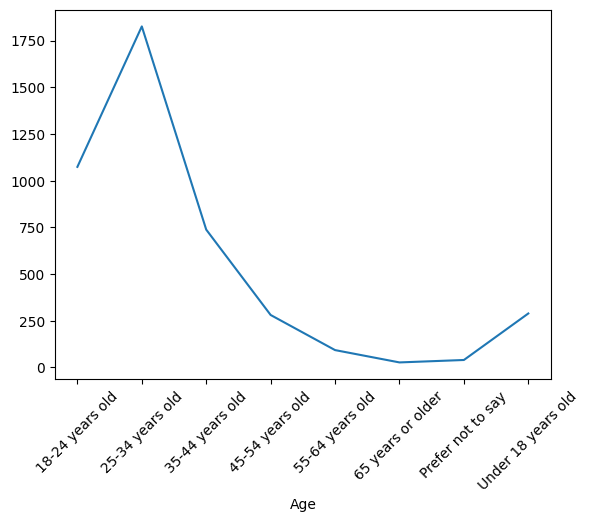

In [10]:
# 선 그래프 그리기
size_by_age.plot.line(rot=45)

<Axes: xlabel='Age'>

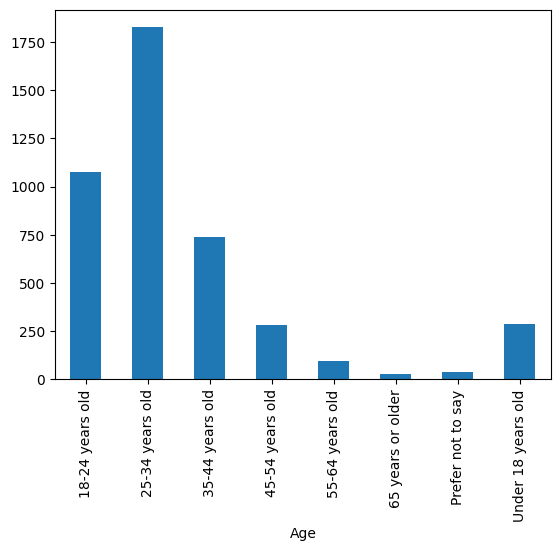

In [11]:
# 수직 막대그래프 그리기
size_by_age.plot.bar()

<Axes: ylabel='Age'>

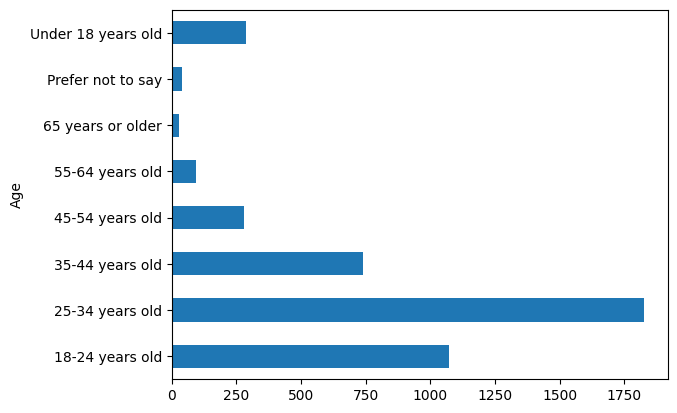

In [12]:
# 수평 막대그래프 그리기
size_by_age.plot.barh()

In [13]:
# 현재 색인 확인하기
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [14]:
# 재색인하기
reindxed_size_by_age = size_by_age.reindex(index=[
    'Prefer not to say',
    '65 years or older',
    '55-64 years old',
    '45-54 years old',
    '35-44 years old',
    '25-34 years old',
    '18-24 years old',
    'Under 18 years old'
    ])

# 재색인한 결과 확인하기
reindxed_size_by_age

Age
Prefer not to say       40
65 years or older       27
55-64 years old         93
45-54 years old        281
35-44 years old        738
25-34 years old       1826
18-24 years old       1074
Under 18 years old     289
dtype: int64

<Axes: ylabel='Age'>

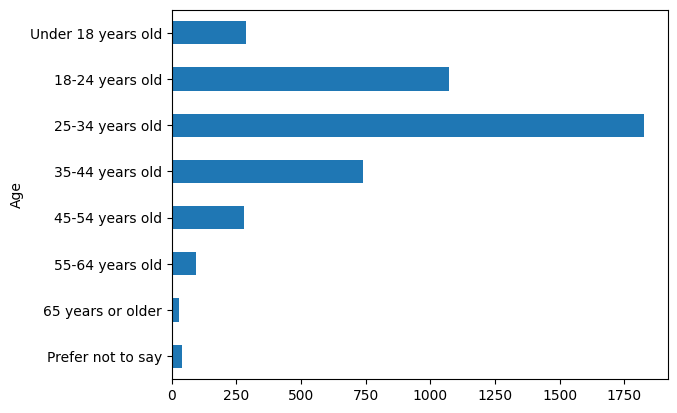

In [15]:
# 수평 그래프 다시 그리기
reindxed_size_by_age.plot.barh()

<Axes: >

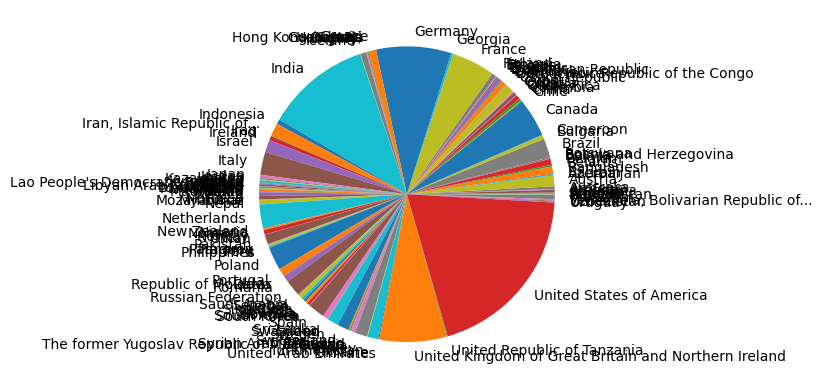

In [16]:
# 기본 파이 그래프 그리기
size_by_country.plot.pie()

<Axes: >

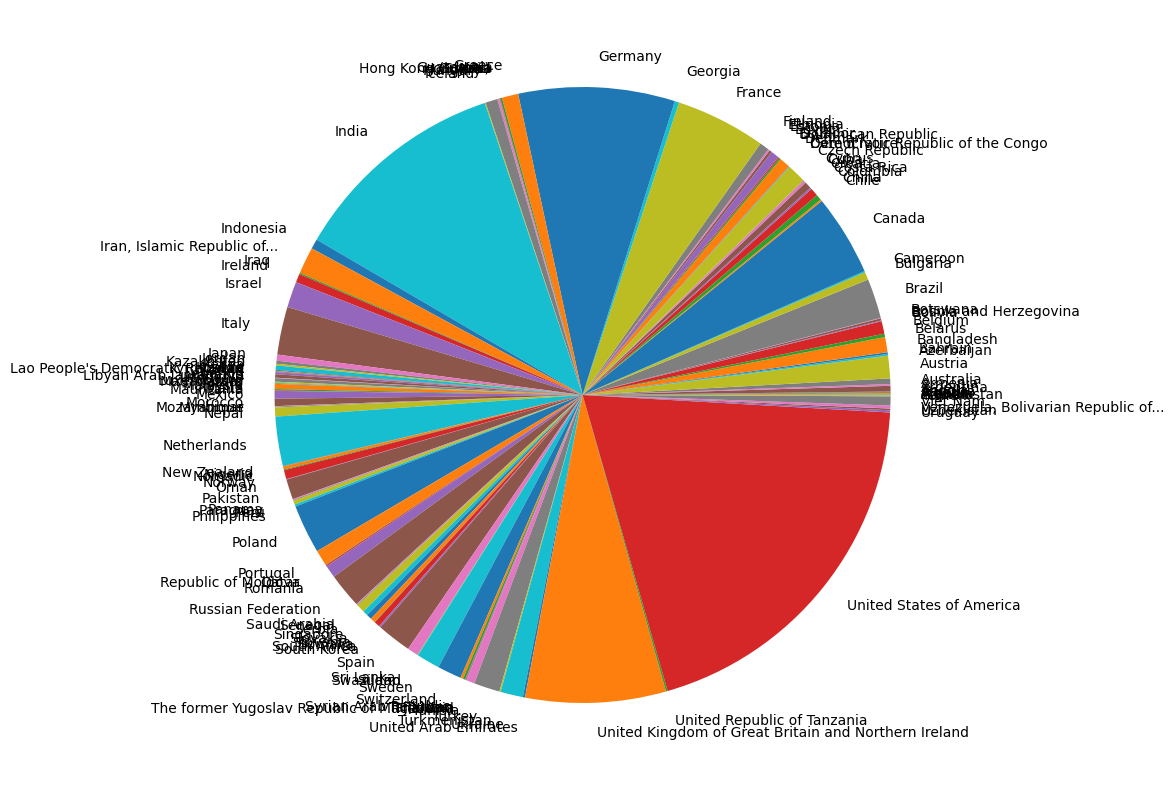

In [17]:
# 파이 그래프 크기 조정하기
size_by_country.plot.pie(figsize=(10, 10))

In [18]:
# 국가 상위 20개 확인하기
size_by_country.nlargest(20)

Country
United States of America                                867
India                                                   505
Germany                                                 362
United Kingdom of Great Britain and Northern Ireland    325
France                                                  209
Canada                                                  188
Netherlands                                             114
Poland                                                  113
Italy                                                   111
Brazil                                                   92
Russian Federation                                       81
Spain                                                    80
Iran, Islamic Republic of...                             62
Israel                                                   60
Turkey                                                   60
Switzerland                                              56
Sweden                          

<Axes: >

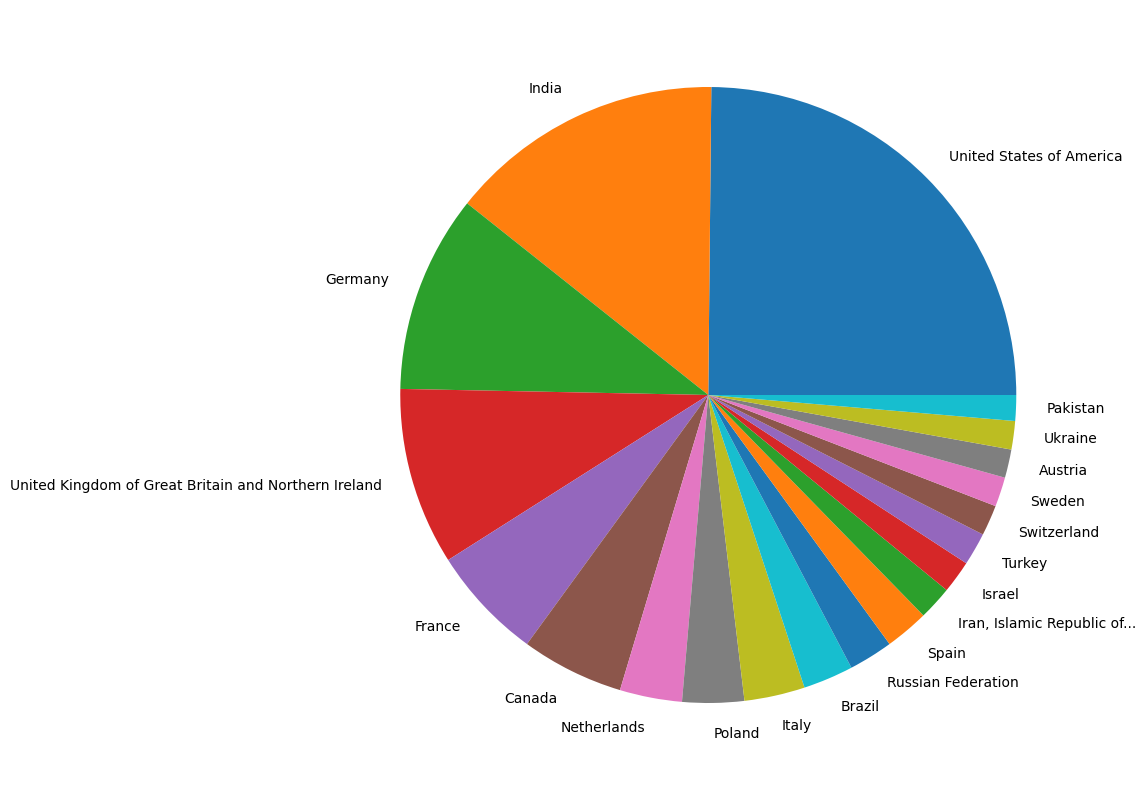

In [19]:
# 국가 상위 20개 파이 그래프 그리기
size_by_country.nlargest(20).plot.pie(figsize=(10, 10))

In [20]:
# 프로그래밍 언어 데이터 추출
languages = revised_data["LanguageHaveWorkedWith"]

# 데이터 확인
languages

0           C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                       JavaScript;Python
2                                Assembly;C;Python;R;Rust
3                                   JavaScript;TypeScript
4                          Bash/Shell;HTML/CSS;Python;SQL
                              ...                        
4410                                                  PHP
4411    Assembly;C++;HTML/CSS;JavaScript;Node.js;PHP;P...
4412    Bash/Shell;C++;Go;Java;JavaScript;Objective-C;...
4413                              C;Go;Java;Ruby;Rust;SQL
4414    Assembly;C;Crystal;Dart;Haskell;HTML/CSS;JavaS...
Name: LanguageHaveWorkedWith, Length: 4415, dtype: object

In [21]:
# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(";")

# 데이터 확인
languages

0       [C++, HTML/CSS, JavaScript, Objective-C, PHP, ...
1                                    [JavaScript, Python]
2                          [Assembly, C, Python, R, Rust]
3                                [JavaScript, TypeScript]
4                     [Bash/Shell, HTML/CSS, Python, SQL]
                              ...                        
4410                                                [PHP]
4411    [Assembly, C++, HTML/CSS, JavaScript, Node.js,...
4412    [Bash/Shell, C++, Go, Java, JavaScript, Object...
4413                       [C, Go, Java, Ruby, Rust, SQL]
4414    [Assembly, C, Crystal, Dart, Haskell, HTML/CSS...
Name: LanguageHaveWorkedWith, Length: 4415, dtype: object

In [22]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

# 데이터 확인
exploded_languages

0               C++
0          HTML/CSS
0        JavaScript
0       Objective-C
0               PHP
           ...     
4414        Node.js
4414         Python
4414           Ruby
4414           Rust
4414            SQL
Name: LanguageHaveWorkedWith, Length: 23858, dtype: object

In [23]:
# 프로그래밍 별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

# 데이터 확인
size_by_languages

LanguageHaveWorkedWith
APL              15
Assembly        275
Bash/Shell     1289
C               986
C#             1222
C++            1168
Clojure          25
Crystal          16
Dart            294
Delphi           62
Elixir           42
Erlang           27
F#               32
Go              409
Groovy          125
HTML/CSS       2410
Haskell          84
Java           1556
JavaScript     2799
Julia            37
Kotlin          426
LISP             50
Matlab          227
Node.js        1493
Objective-C     134
PHP             945
Perl            128
PowerShell      513
Python         2210
R               220
Ruby            201
Rust            412
SQL            2058
Scala           106
Swift           233
TypeScript     1375
VBA             219
Name: LanguageHaveWorkedWith, dtype: int64

<Axes: ylabel='LanguageHaveWorkedWith'>

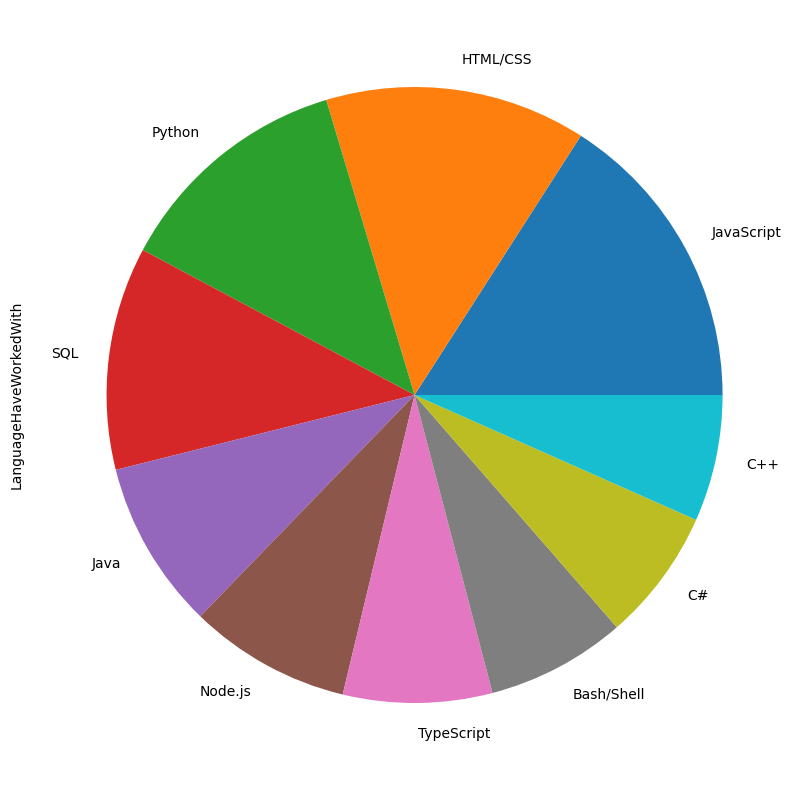

In [24]:
# 파이 그래프 그리기
size_by_languages.nlargest(10).plot.pie(figsize=(10, 10))

<Axes: ylabel='LanguageHaveWorkedWith'>

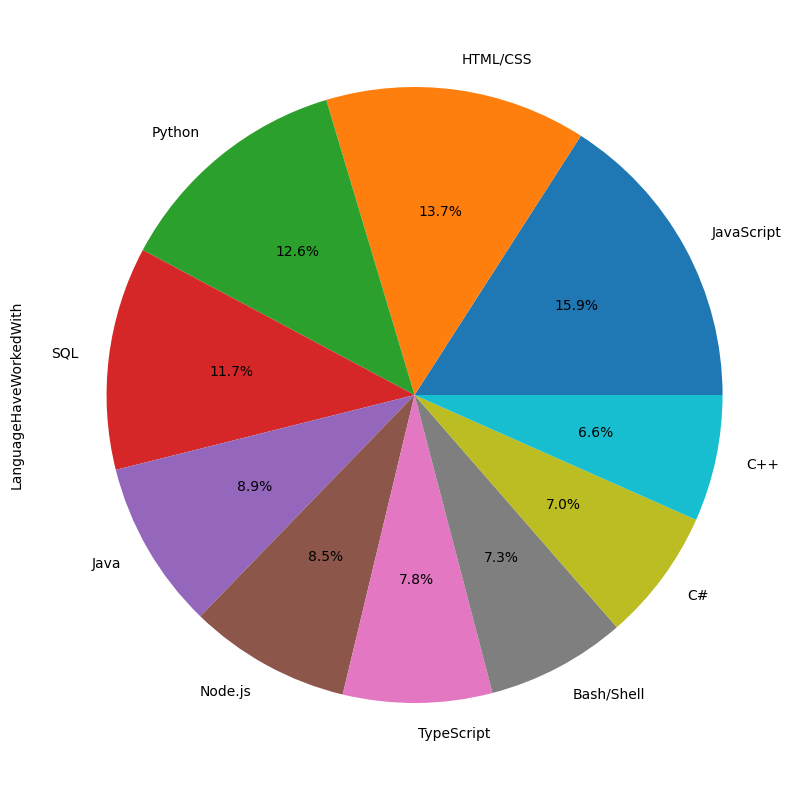

In [25]:
# 백분율 표기하기
size_by_languages.nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')

In [26]:
# 25~34세 연령대가 사용한 프로그래밍 언어 정보 추출
languages_for_25_34 = revised_data[revised_data.Age == '25-34 years old']["LanguageHaveWorkedWith"].str.split(";").explode()

# 데이터 확인
languages_for_25_34

0               C++
0          HTML/CSS
0        JavaScript
0       Objective-C
0               PHP
           ...     
4413             Go
4413           Java
4413           Ruby
4413           Rust
4413            SQL
Name: LanguageHaveWorkedWith, Length: 9483, dtype: object

<Axes: ylabel='LanguageHaveWorkedWith'>

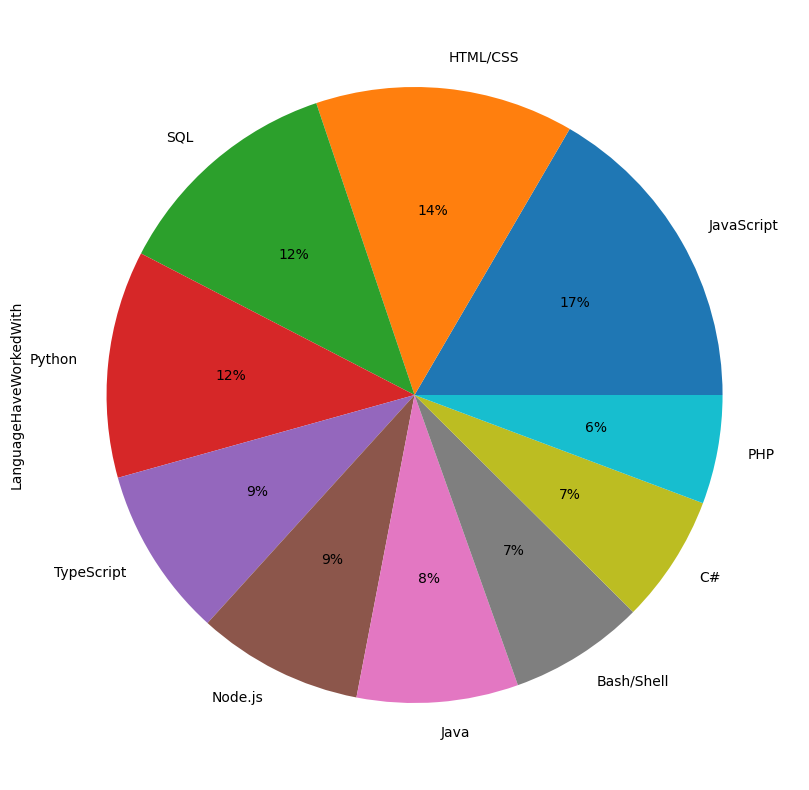

In [27]:
# 상위 10개 데이터 파이 그래프 그리기
languages_for_25_34.groupby(languages_for_25_34).size().nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.0f%%')